In [ ]:
from google.colab import drive
import pandas as pd

# Monter Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Nombre total de replays : 3052
Nombre de joueurs distincts : 200


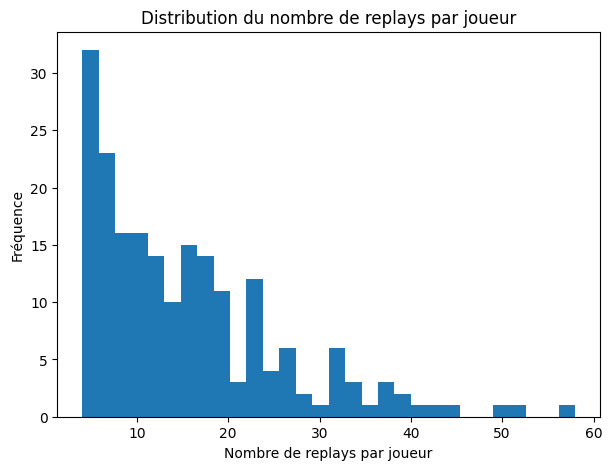

Top 10 joueurs (nombre de replays) :
player
http://kr.battle.net/sc2/en/profile/2348639/1/ParalyzE/    58
http://kr.battle.net/sc2/en/profile/2342419/1/soO/         51
http://kr.battle.net/sc2/en/profile/2341467/1/Classic/     50
http://eu.battle.net/sc2/en/profile/3973341/1/yoeFWSan/    44
http://kr.battle.net/sc2/en/profile/2332264/1/Zest/        42
http://kr.battle.net/sc2/en/profile/2344987/1/Life/        40
http://kr.battle.net/sc2/en/profile/2344031/1/Cure/        39
http://kr.battle.net/sc2/en/profile/2343479/1/True/        39
http://eu.battle.net/sc2/en/profile/2898004/1/MMA/         37
http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/    37
Name: count, dtype: int64


In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt


file_train  = "/content/drive/MyDrive/TRAIN.csv"
players = []
with open(file_train, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) < 2:
            continue
        # row[0] = player URL
        players.append(row[0])

df_players = pd.DataFrame({"player": players})
count_by_player = df_players["player"].value_counts()

print("Nombre total de replays :", len(df_players))
print("Nombre de joueurs distincts :", df_players["player"].nunique())

count_by_player.plot(kind="hist", bins=30, figsize=(7,5))
plt.xlabel("Nombre de replays par joueur")
plt.ylabel("Fréquence")
plt.title("Distribution du nombre de replays par joueur")
plt.show()

# Top 10 joueurs
print("Top 10 joueurs (nombre de replays) :")
print(count_by_player.head(10))


Répartition des races :
race
Protoss    1210
Zerg       1061
Terran      781
Name: count, dtype: int64


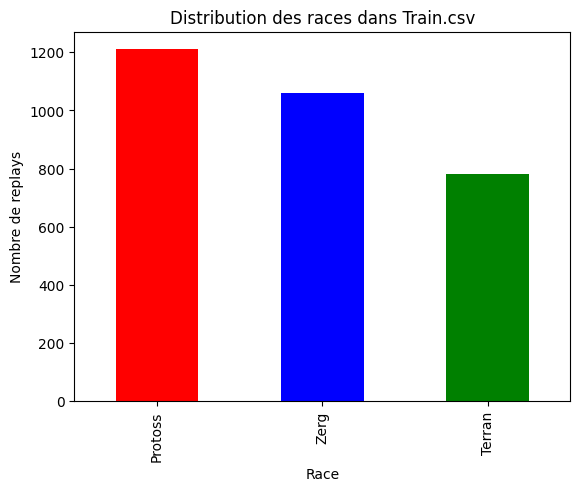

In [ ]:
races = []
with open(file_train, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) < 2:
            continue
        race = row[1]
        races.append(race)

df_races = pd.DataFrame({"race": races})
race_counts = df_races["race"].value_counts()

print("Répartition des races :")
print(race_counts)

race_counts.plot(kind="bar", color=["red","blue","green"])
plt.title("Distribution des races dans Train.csv")
plt.xlabel("Race")
plt.ylabel("Nombre de replays")
plt.show()


Statistiques du nombre d’actions par replay :
count    3052.000000
mean     2415.166448
std      1115.042180
min         0.000000
25%      1647.750000
50%      2233.000000
75%      3019.750000
max      9383.000000
dtype: float64


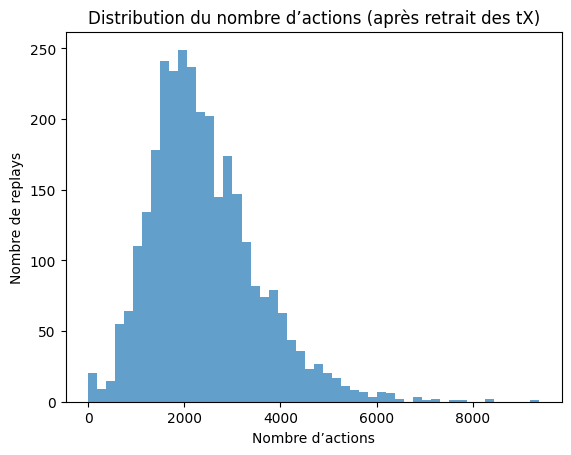

In [ ]:
import re

def remove_time_markers(seq):
    return [x for x in seq if not re.match(r'^t\d+$', x)]

replays_length = []

with open(file_train, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) < 2:
            continue
        actions = row[2:]
        clean_actions = remove_time_markers(actions)
        replays_length.append(len(clean_actions))

import numpy as np
replays_length = np.array(replays_length)

print("Statistiques du nombre d’actions par replay :")
print(pd.Series(replays_length).describe())

plt.hist(replays_length, bins=50, alpha=0.7)
plt.title("Distribution du nombre d’actions (après retrait des tX)")
plt.xlabel("Nombre d’actions")
plt.ylabel("Nombre de replays")
plt.show()


Nombre total d'actions distinctes : 33
Top 20 actions :
s => 2249266
hotkey12 => 1238236
hotkey42 => 914700
hotkey22 => 780152
hotkey32 => 682809
hotkey52 => 646681
hotkey62 => 283773
hotkey02 => 97585
hotkey10 => 81023
Base => 70847
hotkey72 => 68867
hotkey20 => 52711
hotkey82 => 44058
hotkey92 => 42330
hotkey30 => 22173
hotkey11 => 20289
SingleMineral => 17088
hotkey40 => 13234
hotkey21 => 9074
hotkey50 => 7924


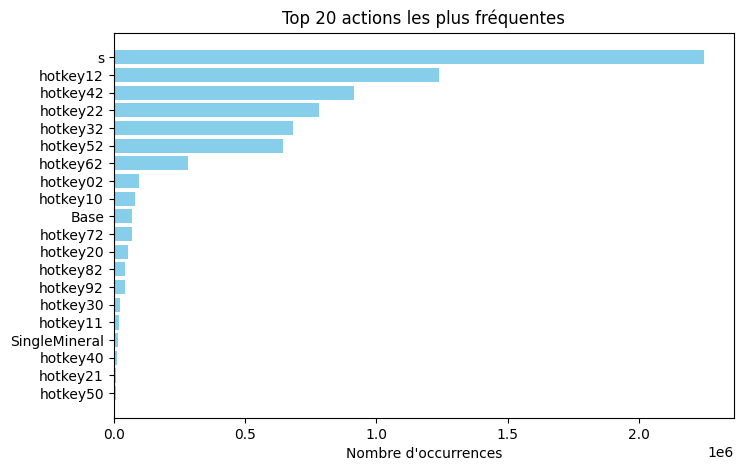

In [ ]:
from collections import Counter

all_actions = Counter()

with open(file_train, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) < 2:
            continue
        acts = row[2:]

        acts = [a for a in acts if not re.match(r'^t\d+$', a)]
        all_actions.update(acts)

print("Nombre total d'actions distinctes :", len(all_actions))

top20 = all_actions.most_common(20)
print("Top 20 actions :")
for action, count in top20:
    print(action, "=>", count)

# On peut aussi faire un petit barplot
top20_keys = [x[0] for x in top20]
top20_vals = [x[1] for x in top20]

plt.figure(figsize=(8,5))
plt.barh(top20_keys[::-1], top20_vals[::-1], color="skyblue")
plt.title("Top 20 actions les plus fréquentes")
plt.xlabel("Nombre d'occurrences")
plt.show()


In [ ]:
import re
from collections import defaultdict, Counter

def remove_time(seq):
    return [x for x in seq if not re.match(r'^t\d+$', x)]

# dictionnaire race -> Counter()
race_counters = defaultdict(Counter)
race_count = defaultdict(int)

with open(file_train, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) < 2:
            continue
        race = row[1]
        actions = remove_time(row[2:])
        race_counters[race].update(actions)
        race_count[race] += 1

for r in race_counters:
    print(f"\n=== Race: {r} ===")
    # top 10 actions
    top10 = race_counters[r].most_common(10)
    for action, cnt in top10:
        print(action, ":", cnt)



=== Race: Protoss ===
s : 581121
hotkey12 : 484783
hotkey22 : 346437
hotkey42 : 333352
hotkey32 : 285441
hotkey52 : 208747
hotkey62 : 107802
Base : 44090
hotkey10 : 30729
hotkey72 : 25495

=== Race: Terran ===
s : 519734
hotkey12 : 330351
hotkey32 : 281911
hotkey42 : 281074
hotkey22 : 200669
hotkey52 : 149747
hotkey62 : 52146
hotkey10 : 24265
hotkey72 : 21353
hotkey92 : 15908

=== Race: Zerg ===
s : 1148411
hotkey12 : 423102
hotkey42 : 300274
hotkey52 : 288187
hotkey22 : 233046
hotkey62 : 123825
hotkey32 : 115457
hotkey02 : 61495
Base : 26515
hotkey10 : 26029


APM stats :
count    3052.000000
mean      135.840407
std        39.199786
min         0.000000
25%       105.917036
50%       133.728887
75%       162.160931
max       284.846154
dtype: float64


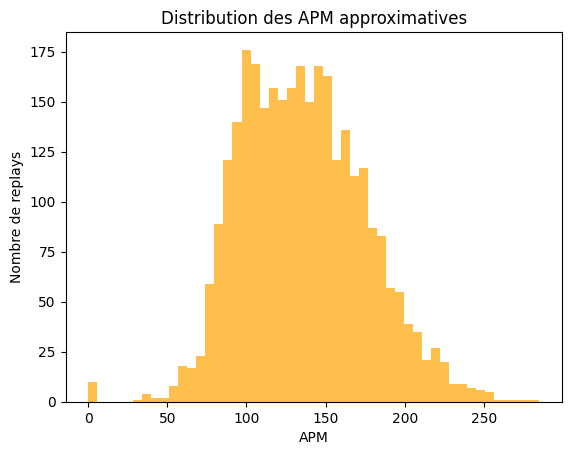

In [ ]:
def extract_last_time(seq):
    # renvoie le plus grand tX, ex. t300 -> 300
    tmax = 0
    for x in seq:
        m = re.match(r'^t(\d+)$', x)
        if m:
            val = int(m.group(1))
            if val > tmax:
                tmax = val
    return tmax

apm_list = []

with open(file_train, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row)<2:
            continue
        actions = row[2:]
        last_time = extract_last_time(actions)
        # Retirer time markers pour compter les "vraies" actions
        clean_acts = [a for a in actions if not re.match(r'^t\d+$', a)]
        total_actions = len(clean_acts)
        # APM = total_actions / (duration_minutes)
        duration_minutes = last_time / 60.0
        apm = total_actions / duration_minutes if duration_minutes>0 else 0
        apm_list.append(apm)

apm_series = pd.Series(apm_list)
print("APM stats :")
print(apm_series.describe())

plt.hist(apm_series, bins=50, color="orange", alpha=0.7)
plt.xlabel("APM")
plt.ylabel("Nombre de replays")
plt.title("Distribution des APM approximatives")
plt.show()


count    3052.000000
mean        2.541046
std         0.347627
min         0.000000
25%         2.367659
50%         2.578338
75%         2.768540
max         3.440578
dtype: float64


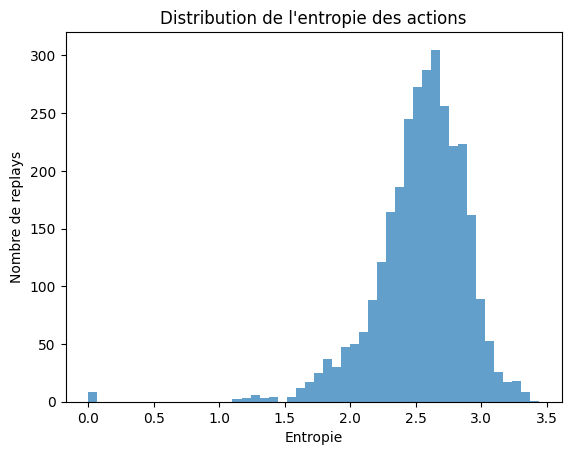

In [ ]:
import math

def entropy_of_actions(action_seq):
    from collections import Counter
    c = Counter(action_seq)
    total = sum(c.values())
    if total==0:
        return 0
    ent = 0
    for k in c:
        p = c[k]/total
        ent -= p*math.log2(p)
    return ent

entropies = []
with open(file_train, "r", encoding="utf-8") as f:
    for row in csv.reader(f):
        if len(row)<2:
            continue
        actions = row[2:]
        # remove tX
        actions = [a for a in actions if not re.match(r'^t\d+$', a)]
        ent = entropy_of_actions(actions)
        entropies.append(ent)

ent_series = pd.Series(entropies)
print(ent_series.describe())

plt.hist(ent_series, bins=50, alpha=0.7)
plt.title("Distribution de l'entropie des actions")
plt.xlabel("Entropie")
plt.ylabel("Nombre de replays")
plt.show()


In [ ]:
import seaborn as sns

corr = df_features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Matrice de corrélation des features globales")
plt.show()


NameError: name 'df_features' is not defined